# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [3]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [ ]:
# Calcular a média dos preços por categoria
media = (df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False))
print(media)

#fazendo o calculo da media utilizando a função .mean()

                    Categoria  Preco_Normal
1          comidas-preparadas   3095.043478
5                     lacteos   2385.219239
2                  congelados   2108.042553
0  belleza-y-cuidado-personal   1783.556485
3                      frutas   1724.473684
6                    verduras   1343.296875
4        instantaneos-y-sopas    765.491228


In [12]:
#Seu código aqui para a mediana
mediana = (df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False))
print(mediana)

#fazendo o calculo da mediana utilizando a função .median()

                    Categoria  Preco_Normal
1          comidas-preparadas        3290.0
0  belleza-y-cuidado-personal        1569.0
2                  congelados        1519.0
3                      frutas        1195.0
6                    verduras        1180.0
5                     lacteos         989.0
4        instantaneos-y-sopas         439.0


Digite aqui as categorias:
| Categoria                  | Média (`mean`) | Mediana (`median`) | Comparação          |
| -------------------------- | -------------- | ------------------ | ------------------- |
| comidas-preparadas         | 3095.04        | 3290.0             | **Média < Mediana** |
| lacteos                    | 2385.22        | 989.0              | **Média > Mediana** |
| congelados                 | 2108.04        | 1519.0             | **Média > Mediana** |
| belleza-y-cuidado-personal | 1783.56        | 1569.0             | **Média > Mediana** |
| frutas                     | 1724.47        | 1195.0             | **Média > Mediana** |
| verduras                   | 1343.30        | 1180.0             | **Média > Mediana** |
| instantaneos-y-sopas       | 765.49         | 439.0              | **Média > Mediana** |


# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [ ]:
#Seu código aqui
desvio_Padrao = (df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Preco_Normal', ascending=False))
print(desvio_Padrao)


#fazendo o calculo do desvio padrão utilizando a função .std()


                    Categoria  Preco_Normal
5                     lacteos   3925.816164
0  belleza-y-cuidado-personal   2210.041719
2                  congelados   2111.539896
1          comidas-preparadas   2019.911428
3                      frutas   1639.151114
4        instantaneos-y-sopas   1170.232869
6                    verduras   1012.699625


Digite nesse campo o comportamento que você identificou.

Se o valor médio for significativamente superior ao valor central, isso aponta para a existência de itens excepcionalmente caros, bem como uma grande oscilação nos preços (como no caso dos laticínios).

Por outro lado, se a média for inferior à mediana, isso sugere a presença de itens atipicamente baratos que puxam a média para baixo (como acontece com pratos já prontos).

Um desvio padrão elevado demonstra que os preços dentro da categoria são bastante diversos, revelando uma extensa gama de produtos e diferentes níveis de preços.


# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

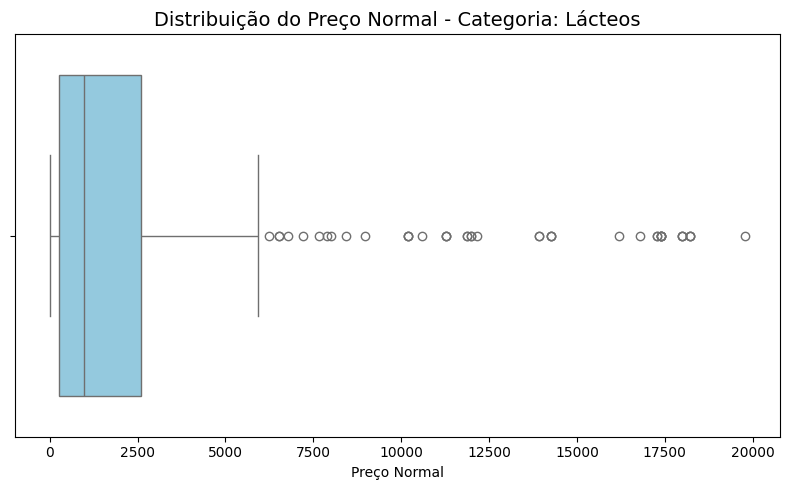

In [ ]:

df_lacteos = df.loc[df['Categoria'] == 'lacteos']

# Plotar o boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_lacteos['Preco_Normal'], color='skyblue')

plt.title('Distribuição do Preço Normal - Categoria: Lácteos', fontsize=14)
plt.xlabel('Preço Normal')
plt.tight_layout()
plt.show()


#Sim, foi identificado muitos Outliers, a categoria lácteos apresenta uma distribuição assimétrica à direita, 
#com muitos produtos baratos e poucos produtos extremamente caros, 
#o que gera alto desvio padrão e média bem acima da mediana

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

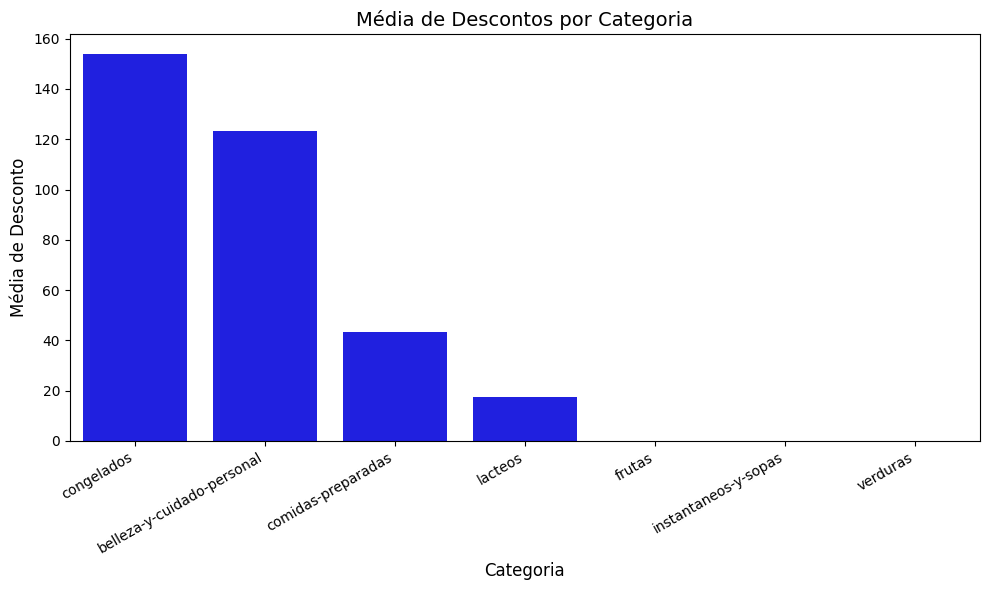

In [24]:
media_descontos = (df.groupby('Categoria')['Desconto'].mean().reset_index().sort_values(by='Desconto', ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(
    data=media_descontos,
    x='Categoria',
    y='Desconto',
    color='blue'
)

plt.title('Média de Descontos por Categoria', fontsize=14)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Média de Desconto', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [28]:

import plotly.express as px

df_media = (
    df.groupby(['Categoria', 'Marca'])['Desconto']
      .mean()
      .reset_index()
)


fig = px.scatter(
    df_media,
    x='Categoria',
    y='Marca',
    size='Desconto',
    color='Categoria',
    hover_data={'Desconto': ':.2f'},
    title='Média de Desconto por Categoria e Marca',
    height=700
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()